# **PART A**

### Research question

What is the effect of the explanatory variables **age** (discrete variable, name in the data - Age), **cholesterol** (continuous variable, name in the data - totChol) and **cigarettes Per Day** (discrete variable, name in the data - cigsPerDay) on the explanatory variable **BMI** (continuous variable, name in the data - BMI)

In [1]:
# section 1A a
import random
import pandas as pd
import numpy as np
from scipy.stats import f, chi2
import numpy.linalg as ln
from sklearn.linear_model import LinearRegression

df = pd.read_csv("framingham_heart_disease.csv") 
df =df.dropna()

data = df[["age","totChol","cigsPerDay","BMI"]]
 # 200 random samples of x, and save all the other samples that not in thos 200 also 
data_200 = data.sample(n=200, random_state = 55) 
not_data_200 = data.drop(data_200.index)

data_200 = data_200.reset_index(drop = True)

data_200.insert(0, 'b0', 1)
y = data_200["BMI"]
x = data_200[['b0', "age","totChol","cigsPerDay"]]
CIs = {}
b_ols_plug_in = np.dot(np.dot(ln.inv(np.dot(np.transpose(x),x)),np.transpose(x)),y)
C = ln.inv(np.dot(np.transpose(x),x))
print("b ols = ", b_ols_plug_in)
z = 2
e_square = np.dot(np.transpose(y-np.dot(x,b_ols_plug_in)),y-np.dot(x,b_ols_plug_in))
res_var_est = e_square/(len(y)-4)
C=ln.inv(np.dot(np.transpose(x),x))
CIn = []
for i in range(len(C)):
  res_se_est = np.sqrt(res_var_est*C[i][i])
  interval = z*res_se_est
  CI = (b_ols_plug_in[i]-interval,b_ols_plug_in[i]+interval)
  CIn.append(CI) 
  print("",i ,"Confidence interval of beta, s.e based on variance matrix of the beta coefficients vector: [",CI,"]")
CIs["variance matrix"] = CIn

b ols =  [ 2.09048473e+01  7.58433515e-03  1.82024267e-02 -2.67932871e-02]
 0 Confidence interval of beta, s.e based on variance matrix of the beta coefficients vector: [ (17.151059499039302, 24.65863509536668) ]
 1 Confidence interval of beta, s.e based on variance matrix of the beta coefficients vector: [ (-0.06301489503831684, 0.07818356534657508) ]
 2 Confidence interval of beta, s.e based on variance matrix of the beta coefficients vector: [ (0.005511462482076226, 0.030893390875850434) ]
 3 Confidence interval of beta, s.e based on variance matrix of the beta coefficients vector: [ (-0.0732277079497792, 0.019641133723413605) ]


In [2]:
# section 1A b

from statistics import mean

def bootstrap_normal_se(df0,  B=400,  n=200, z=1.96):
    beta_arr = []
    CIb = []
    for i in range(B):
        X_sample = np.zeros((n,4))
        Y_sample = np.zeros(n)
        for j in range(n):
          u = random.randint(0, n-1)
          X_sample[j] = df0[["b0", "age","totChol","cigsPerDay"]].loc[u]
          Y_sample[j] = df0["BMI"].loc[u]
        beta_arr.append(np.dot(np.dot(ln.inv(np.dot(np.transpose(X_sample),X_sample)),np.transpose(X_sample)),Y_sample))
    
    for i in range(4):
      elements = [lst[i] for lst in beta_arr]
      curr_bootstrap_mean = mean(elements)
      se = np.std(elements)
      pivot_CI = (curr_bootstrap_mean - se*z,curr_bootstrap_mean + se*z)
      CIb.append(pivot_CI)
      print("Confidence interval of beta, s.e based on Bootstrap and Normal approximation",i ,": ", pivot_CI)
    return CIb
CIs["Normal approximation"] = bootstrap_normal_se(data_200)


Confidence interval of beta, s.e based on Bootstrap and Normal approximation 0 :  (17.253268739003662, 24.57491923884601)
Confidence interval of beta, s.e based on Bootstrap and Normal approximation 1 :  (-0.0634353955731702, 0.07809590763969666)
Confidence interval of beta, s.e based on Bootstrap and Normal approximation 2 :  (0.0056283207829100415, 0.030849976757809712)
Confidence interval of beta, s.e based on Bootstrap and Normal approximation 3 :  (-0.07223096035426688, 0.016808940643564176)


In [3]:
# section 1A c

def bootstrap_pivot_confidence_interval(df0, B=400,  n=200):
    beta_arr = []
    CIc = []

    for i in range(B):
        X_sample = np.zeros((n,4))
        Y_sample = np.zeros(n)
        for j in range(n):
          u = random.randint(0, n-1)
          X_sample[j] = df0[["b0", "age","totChol","cigsPerDay"]].loc[u]
          Y_sample[j] = df0["BMI"].loc[u]
        beta_arr.append(np.dot(np.dot(ln.inv(np.dot(np.transpose(X_sample),X_sample)),np.transpose(X_sample)),Y_sample))
   

    for i in range(4):
        elements = [lst[i] for lst in beta_arr]
        curr_bootstrap_mean = mean(elements)
        pivot_samples = [np.sqrt(n)*(elements[i]-curr_bootstrap_mean) for i in range(B)]
        pivot_CI = (curr_bootstrap_mean - np.percentile(pivot_samples,97.5)/np.sqrt(n),curr_bootstrap_mean - np.percentile(pivot_samples,2.5)/np.sqrt(n))
        CIc.append(pivot_CI)
        print("Confidence interval of beta, s.e based on pivot",i ,": ", pivot_CI)
    return CIc
CIs["pivot"] = bootstrap_pivot_confidence_interval(data_200)



Confidence interval of beta, s.e based on pivot 0 :  (17.4303546528404, 24.241901567576114)
Confidence interval of beta, s.e based on pivot 1 :  (-0.06333760652988982, 0.0735604990104303)
Confidence interval of beta, s.e based on pivot 2 :  (0.005020124181382722, 0.029688269952485642)
Confidence interval of beta, s.e based on pivot 3 :  (-0.07049192261324366, 0.01443883368592026)


In [4]:
# section 1A d

def bootstrap_chevron_confidence_interval(df0, B=400,  n=200):
    beta_arr = []
    CId = []
    for i in range(B):
        X_sample = np.zeros((n,4))
        Y_sample = np.zeros(n)
        for j in range(n):
          u = random.randint(0, n-1)
          X_sample[j] = df0[["b0", "age","totChol","cigsPerDay"]].loc[u]
          Y_sample[j] = df0["BMI"].loc[u]
        beta_arr.append(np.dot(np.dot(ln.inv(np.dot(np.transpose(X_sample),X_sample)),np.transpose(X_sample)),Y_sample))
   

    for i in range(4):
        elements = [lst[i] for lst in beta_arr]
        pivot_CI = (np.percentile(elements,2.5),np.percentile(elements,97.5))
        CId.append(pivot_CI)
        print("Confidence interval of beta, s.e based on chevrons",i ,": ", pivot_CI)
    return CId
CIs["chevrons"] = bootstrap_pivot_confidence_interval(data_200)


Confidence interval of beta, s.e based on pivot 0 :  (17.465791495442296, 23.86776023655643)
Confidence interval of beta, s.e based on pivot 1 :  (-0.06637037526760407, 0.08100626241431819)
Confidence interval of beta, s.e based on pivot 2 :  (0.005824887710780777, 0.030478656410333895)
Confidence interval of beta, s.e based on pivot 3 :  (-0.06948305260983684, 0.01743637469502347)


In [5]:
# section 2A 

Conf = CIs.items()
for i in range(4):
    best_sort = sorted(Conf, key=lambda x: x[1][i][1]-x[1][i][0])
    print(f"The length of the confidence interval by sections for beta {i} : {best_sort[0][0]} < {best_sort[1][0]} < {best_sort[2][0]} < {best_sort[3][0]}") 

    a = CIs["variance matrix"][i][0] <= b_ols_plug_in[i] and b_ols_plug_in[i]<= CIs["variance matrix"][i][1]
    b = CIs["Normal approximation"][i][0] <= b_ols_plug_in[i] and b_ols_plug_in[i]<= CIs["Normal approximation"][i][1]
    c = CIs["pivot"][i][0] <= b_ols_plug_in[i] and b_ols_plug_in[i]<= CIs["pivot"][i][1]
    d = CIs["chevrons"][i][0] <= b_ols_plug_in[i] and b_ols_plug_in[i]<= CIs["chevrons"][i][1]

    print(f"Are the beta {i} values within the appropriate confidence interval : variance matrix **{a}**, Normal approximation **{b}**, pivot **{c}**, chevrons **{d}**")
    print()


The length of the confidence interval by sections for beta 0 : chevrons < pivot < Normal approximation < variance matrix
Are the beta 0 values within the appropriate confidence interval : variance matrix **True**, Normal approximation **True**, pivot **True**, chevrons **True**

The length of the confidence interval by sections for beta 1 : pivot < variance matrix < Normal approximation < chevrons
Are the beta 1 values within the appropriate confidence interval : variance matrix **True**, Normal approximation **True**, pivot **True**, chevrons **True**

The length of the confidence interval by sections for beta 2 : chevrons < pivot < Normal approximation < variance matrix
Are the beta 2 values within the appropriate confidence interval : variance matrix **True**, Normal approximation **True**, pivot **True**, chevrons **True**

The length of the confidence interval by sections for beta 3 : pivot < chevrons < Normal approximation < variance matrix
Are the beta 3 values within the approp

### section 2A continued

We accepted that in all cases the confidence intervals contained the appropriate beta value, in addition it can be seen that the order of the lengths of the confidence intervals between the different methods varies between the different betas in the model

In [6]:
# section 3A a

not_x200_sample = not_data_200.sample(n = 100, random_state=8)
not_x200_sample.insert(0, "b0", 1)
not_x200_sample = not_x200_sample.reset_index(drop = True)
y_new = not_x200_sample["BMI"]
x_new = not_x200_sample[["b0", "age","totChol","cigsPerDay"]]


y_predict = np.dot(x_new,b_ols_plug_in)
y_predict = np.squeeze(y_predict)
y_new_indexed = y_new.reset_index(drop = True)
y_new_indexed

0     23.84
1     25.25
2     24.19
3     23.87
4     27.22
      ...  
95    25.40
96    21.14
97    23.02
98    31.78
99    25.45
Name: BMI, Length: 100, dtype: float64

In [7]:
from re import I
# section 3A b

def bootstrap_pivot_new_sample(df0,df1, B=400,  n=100, z=1.96):
    pred = []
    CI = []
    y_new = df0["BMI"]
    x_new = df0[["b0", "age","totChol","cigsPerDay"]]
    for i in range(B):
        X_sample = np.zeros((2*n,4))
        Y_sample = np.zeros(2*n)
        for j in range(2*n):
          u = random.randint(0, 2*n-1)
          X_sample[j] = df1[["b0", "age","totChol","cigsPerDay"]].loc[u]
          Y_sample[j] = df1["BMI"].loc[u]
        beta = np.dot(np.dot(ln.inv(np.dot(np.transpose(X_sample),X_sample)),np.transpose(X_sample)),Y_sample)
        pred.append(np.dot(x_new,beta))

    in_CI_counter = 0
    for i in range(len(y_new)):
      elements = [lst[i] for lst in pred]
      curr_bootstrap_mean = mean(elements)

      se = np.std(elements)
      pivot_CI = (curr_bootstrap_mean - se*z,curr_bootstrap_mean + se*z)
      
      if pivot_CI[0] <= y_new[i] and pivot_CI[1] >= y_new[i]:
          in_CI_counter+=1
      print(f"CI for sample {i} is : {pivot_CI}")

    return in_CI_counter/n
    
    
Hit_percentage = bootstrap_pivot_new_sample(not_x200_sample, data_200)


CI for sample 0 is : (24.025458393215338, 25.791819858549893)
CI for sample 1 is : (24.375127899253428, 26.089075575087463)
CI for sample 2 is : (26.25432809309286, 29.93565466336797)
CI for sample 3 is : (26.095314894148036, 29.35877901037267)
CI for sample 4 is : (24.126009576164396, 26.920849574190743)
CI for sample 5 is : (25.558908595339293, 27.63849822702581)
CI for sample 6 is : (25.25689585314999, 27.30137592249217)
CI for sample 7 is : (23.967995255853673, 26.647768788399816)
CI for sample 8 is : (24.968017710231074, 26.367295010517473)
CI for sample 9 is : (22.67821033164374, 25.263728735771245)
CI for sample 10 is : (25.043070572273493, 26.541412413270763)
CI for sample 11 is : (25.076916495250284, 26.53786813802579)
CI for sample 12 is : (23.982861508928778, 25.719484640664405)
CI for sample 13 is : (25.512573377976977, 27.35835493493971)
CI for sample 14 is : (24.04870268288306, 26.77346816978322)
CI for sample 15 is : (23.35898111121963, 25.617350041756897)
CI for sample 

In [8]:
# section 3A c

print(f"Hit percentage in CI's is : {Hit_percentage}")


Hit percentage in CI's is : 0.2


### section 3A c continued
We accepted that only 20% of the confidence intervals contained the true Y value.
This result may happen because the data we use is not linear, and the linear regression model is not able to accurately fit the data to the confidence intervals.

### section 3A d
We will try to estimate the standard deviation of the prediction of Y and we will also refer to the standard deviation of the noise as we saw in practice 5. This time we will estimate with the help of bootstrap the standard deviation of the residuals, we will calculate the differences between our prediction for the sample and the true Y value, this is how we will get the residuals. Now for these residuals we will create B bootstrap samples where the statistic considered each time is the mean of the residuals. Finally we calculated the standard deviation of all the averages of the residuals we got

# **PART B**

In [9]:
#intro
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f, norm, t, chi2
from scipy import stats

df = pd.read_csv("framingham_heart_disease.csv") 
df = df.dropna()


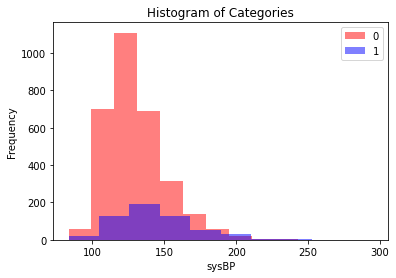

In [ ]:
#intro
import matplotlib.pyplot as plt

categories = df["TenYearCHD"].unique()
plt.hist(df[df["TenYearCHD"] == 0]["sysBP"], color="red", alpha=0.5)
plt.hist(df[df["TenYearCHD"] == 1]["sysBP"], color="blue", alpha=0.5)
plt.xlabel("sysBP")
plt.ylabel("Frequency")
plt.title("Histogram of Categories")
plt.legend([0,1])
plt.show()

### ex1
our question - Do people at **Risk of heart disease in the next 10 years** have high blood pressure vs people who isn't in **Risk of heart disease in the next 10 years**?

In [10]:
#ex2
samples_200 = df.sample(200, random_state=2)
samples_200 = samples_200[["TenYearCHD","sysBP"]].reset_index(drop=True)


In [11]:
#ex3 section a
TenYearCHD_0 = samples_200.loc[samples_200["TenYearCHD"]==0]["sysBP"]
group0_mean = TenYearCHD_0.mean()

TenYearCHD_1 = samples_200.loc[samples_200["TenYearCHD"]==1]["sysBP"]
group1_mean = TenYearCHD_1.mean()
lamda = group1_mean - group0_mean

Yes, this is a maximum visibility estimator. We have already seen that the maximum visibility for the lifespan of each of the groups is the average, the maximum visibility estimate for the subtraction of one factor from the other is also the maximum for the newest change.
The bootstrap estimator  is considered a non-parametric method, meaning it does not assume any particular distribution of the data, unlike MLE which assumes a specific probability distribution so its not MLE estimator

In [12]:
#ex3 section b
import numpy as np

group0_var = samples_200[samples_200["TenYearCHD"] == 0]["sysBP"].var()
group1_var = samples_200[samples_200["TenYearCHD"] == 1]["sysBP"].var()

n_0 =len(samples_200[samples_200["TenYearCHD"] == 0]) 
n_1 =len(samples_200[samples_200["TenYearCHD"] == 1]) 

lower_bound = lamda - 1.96*np.sqrt(group0_var/n_0 + group1_var/n_1)
upper_bound = lamda + 1.96*np.sqrt(group0_var/n_0 + group1_var/n_1)
[lower_bound, upper_bound]

[-2.3011125890490636, 16.612124493810988]

In [13]:
#ex3 section c
TenYearCHD_0 = df.loc[df["TenYearCHD"]==0]["sysBP"]
group0_mean = TenYearCHD_0.mean()

TenYearCHD_1 = df.loc[df["TenYearCHD"]==1]["sysBP"]
group1_mean = TenYearCHD_1.mean()
lamda = group1_mean - group0_mean
if lamda >= lower_bound and lamda <= upper_bound:
  print("lamda in CI")
else:
  print("lamda not in CI")

lamda in CI


In [21]:
#ex3 section d
#wald test
print("wald test")
w = lamda/np.sqrt(group0_var/n_0 + group1_var/n_1)
if abs(w) > 1.96 : 
  print("lamda not equal to zero")
else:
  print("lamda not equal  zero")

from scipy import stats
pv = 1- stats.norm.cdf(w)
print(f"wald test p value - {pv}")
print("---------------")
print("permutation test")
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom


TenYearCHD_0 = samples_200.loc[samples_200["TenYearCHD"]==0]["sysBP"]
group0_mean = TenYearCHD_0.mean()

TenYearCHD_1 = samples_200.loc[samples_200["TenYearCHD"]==1]["sysBP"]
group1_mean = TenYearCHD_1.mean()
lamda = group1_mean - group0_mean

statistic = lamda

y_sums = []
for i in range(400):
  sample = samples_200.sample(len(samples_200), replace=True)
  TenYearCHD_0 = sample.loc[sample["TenYearCHD"]==0]["sysBP"]
  group0_mean = TenYearCHD_0.mean()
  TenYearCHD_1 = sample.loc[sample["TenYearCHD"]==1]["sysBP"]
  group1_mean = TenYearCHD_1.mean()

  y_sums.append(group1_mean-group0_mean)

final_counter = 0
for combination in y_sums:
  if combination >= statistic:
    final_counter+=1

print(final_counter/400)


wald test
lamda not equal  zero
wald test p value - 0.06902840677492572
---------------
permutation test
0.475


In [15]:
##ex4 section a
m0 = samples_200[samples_200["TenYearCHD"] == 0]["sysBP"].median()
m1 = samples_200[samples_200["TenYearCHD"] == 1]["sysBP"].median()
differnce_medians = m1 - m0
medians = []
for i in range(400):
  sample = samples_200.sample(len(samples_200), replace=True)
  medians.append(sample[sample["TenYearCHD"] == 1]["sysBP"].median()-sample[sample["TenYearCHD"] == 0]["sysBP"].median())

bootstrap_differnce_medians_mean = np.mean(medians)
bootstrap_differnce_medians_se = np.sqrt(np.var(medians))



we used a bootstrap estimator so it is not the MLE.

In [16]:
#ex4 section C
for i in range(400):
  sample = df.sample(len(df), replace=True)
  medians.append(sample[sample["TenYearCHD"] == 1]["sysBP"].median()-sample[sample["TenYearCHD"] == 0]["sysBP"].median())

bootstrap_differnce_medians_mean = np.mean(medians)
bootstrap_differnce_medians_mean

7.9228125

yes, the difference between medians is in the CI

In [17]:
#ex4 section D
statistic = differnce_medians

y_medians = []
for i in range(400):
  sample = samples_200.sample(len(samples_200), replace=True)
  m0 = sample[sample["TenYearCHD"] == 0]["sysBP"].median()
  m1 = sample[sample["TenYearCHD"] == 1]["sysBP"].median()
  differ_medians = m1 - m0

  y_medians.append(differ_medians)

final_counter = 0
for combination in y_medians:
  if combination >= statistic:
    final_counter+=1


print(final_counter/400)

0.54


###ex4 section E:
we can't use wald test nor t-test on our estimator because a bootstrap estimator is not a asymptotic normal and that a neccesirly condition for wald test and t-test


In [18]:
#ex5
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

samples_200 = samples_200.sort_values("sysBP").reset_index(drop=True)
originals_indexs = []
current_index = []
for index, row in samples_200.iterrows():
    if index<199 and samples_200.iloc[index]["sysBP"] == samples_200.iloc[index+1]["sysBP"]:
      current_index.append(index+1)
    else:
      current_index.append(index+1) 
      originals_indexs.append(current_index)
      current_index = []

final_indexs = []
counter_i = 0
for sub_index in originals_indexs:
  if len(sub_index) == 1:
    final_indexs.append(sub_index[0])
  else:
    counter = len(sub_index)
    while counter>0:
      final_indexs.append(np.mean(sub_index))
      counter-=1

samples_200["new_index"] = final_indexs
originals_locations = []
for index, row in samples_200.iterrows():
    if row["TenYearCHD"] == 1 :
      originals_locations.append(row["new_index"])

statistic = np.sum(originals_locations)

y_locations=[] 
for i in range(400):
  sample = samples_200.sample(len(samples_200), replace=True)
  sample = sample.sort_values("sysBP").reset_index(drop=True)
  originals_indexs = []
  current_index = []
  for index, row in samples_200.iterrows():
    if index<199 and samples_200.iloc[index]["sysBP"] == samples_200.iloc[index+1]["sysBP"]:
      current_index.append(index+1)
    else:
      current_index.append(index+1) 
      originals_indexs.append(current_index)
      current_index = []

  indexs = []
  for sub_index in originals_indexs:
    if len(sub_index) == 1:
      indexs.append(sub_index[0])
    else:
      counter = len(sub_index)
      while counter>0:
        indexs.append(np.mean(sub_index))
        counter -= 1

  samples_200["new_index"] = indexs

  sample["new_index"] = indexs
  y_current_locations=[] 
  for index, row in sample.iterrows():
    if row["TenYearCHD"] == 1 :
      y_current_locations.append(row["new_index"])

  y_locations.append(y_current_locations)

final_counter = 0
for combination in y_locations:
  if np.sum(combination) >= statistic:
    final_counter+=1


print(final_counter/400)

0.485


### ex6
In the permutation tests we got the values 0.475 for the expectations 0.54 for the medians and 0.485 in Wilcoxon what are the p-values, in addition we got both for the differences of the expectations and for the differences of the medians because the confidence intervals contain the value 0, all of these connect together and show that the difference may not be There is a rule, in addition they get along well with the histogram since it seems that in both categories you get similar values. The only test that showed otherwise is the wald test but with a pvalue of 0.07 a value that does not show such strong significance and it may also happen that the sample size is not large enough